In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import imread
from fixmat import load as fix_load
from utils import write_datasets
%matplotlib inline

In [2]:
df, attrs = fix_load('fix_data/etdb_v1.0.hdf5','Baseline')

###### DATASET: The top level dictionary is simply name (string -> dictionary).
The nested dictionary is the DATA DICTIONARY, which has the following keys:
  'train_data' and 'valid_data', whose values are the corresponding training
    and validation data with shape
    ExTxD, E - # examples, T - # time steps, D - # dimensions in data.
  The data dictionary also has a few more keys:
    'train_ext_input' and 'valid_ext_input', if there are know external inputs
      to the system being modeled, these take on dimensions:
      ExTxI, E - # examples, T - # time steps, I = # dimensions in input.
   'alignment_matrix_cxf' - If you are using multiple days data, it's possible
     that one can align the channels (see manuscript).  If so each dataset will
     contain this matrix, which will be used for both the input adapter and the
     output adapter for each dataset. These matrices, if provided, must be of
     size [data_dim x factors] where data_dim is the number of neurons recorded
     on that day, and factors is chosen and set through the '--factors' flag.
   'alignment_bias_c' - See alignment_matrix_cxf.  This bias will used to
     the offset for the alignment transformation.  It will *subtract* off the
     bias from the data, so pca style inits can align factors across sessions.

In [3]:
# make unique index for trial
df['subj_trial'] = df["filenumber"].map(str) +'_'+ df["SUBJECTINDEX"].map(str) +'.'+ df["trial"].map(str)
# take single image category
df_7 = df.query('category==7.0')
# pivot table ==> trial
x_arr = df_7.pivot(index='subj_trial', columns='fix', values='x')
x_arr = x_arr.fillna(0)
y_arr = df.query('category==7.0').pivot(index='subj_trial', columns='fix', values='y')
y_arr = y_arr.fillna(0)
# trial x fix x dim
saccade_data = np.stack((x_arr.values,y_arr.values),axis=2)
saccade_data.shape

(3068, 31, 2)

In [ ]:
stimuli = np.array([imread('stimuli/{}/{}.png'.format(7, idx.split('.')[0])) for idx in x_arr.index])

In [ ]:
train = saccade_data[:2500]
valid = saccade_data[2500:]
train_input = stimuli[:2500]
valid_input = stimuli[2500:]
print(train.shape, valid.shape, train_input.shape, valid_input.shape)

In [ ]:
data = {'train_data' : train,
        'valid_data' : valid,
        'train_ext_input' : train_input,
        'valid_ext_input': valid_input}

In [ ]:
datasets = {}
dataset_name = 'dataset_N' + str(1)
datasets[dataset_name] = data
# write out the dataset
write_datasets('./', 'lfad_saccades', datasets)

In [85]:
# cat_7 = df.query('category==7.0')
# cat_7_new = pd.DataFrame()
# for idx in range(cat_7.size):
#     cat_7_new.append(cat_7.iloc[idx])
# cat_7_new

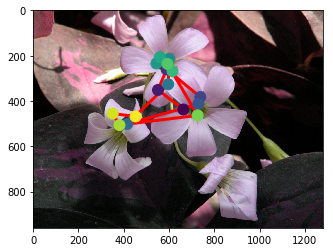

In [53]:
# t1s1 = df.query('SUBJECTINDEX==48.0').query('trial==243.0')
# category = int(t1s1['category'].iloc[0])
# filename = int(t1s1['filenumber'].iloc[0])
# stimuli = imread('stimuli/{}/{}.png'.format(category, filename))
# x,y = t1s1['x'],t1s1['y']
# colors = np.arange(x.size)*2
# plt.plot(x, y, 'r', zorder=1, lw=3)
# plt.scatter(x, y, c=colors, s=120, zorder=2)
# plt.imshow(stimuli,zorder=0)
# plt.show()

In [54]:
# t1s1

,SUBJECTINDEX,category,dataset_nr,end,eye,filenumber,fix,pupil,start,trial,x,y
203544,48.0,7.0,3.0,559.0,1.0,26.0,2.0,3532.671875,317.0,243.0,663.0,437.0
203545,48.0,7.0,3.0,895.0,1.0,26.0,3.0,3608.578369,589.0,243.0,551.0,351.0
203546,48.0,7.0,3.0,1919.0,1.0,26.0,4.0,3616.754883,917.0,243.0,589.0,260.0
203547,48.0,7.0,3.0,2239.0,1.0,26.0,5.0,3721.401367,1957.0,243.0,738.0,382.0
203548,48.0,7.0,3.0,2539.0,1.0,26.0,6.0,3806.091309,2257.0,243.0,729.0,413.0
203549,48.0,7.0,3.0,2875.0,1.0,26.0,7.0,3877.857910,2581.0,243.0,415.0,501.0
203550,48.0,7.0,3.0,3107.0,1.0,26.0,8.0,3770.644775,2925.0,243.0,596.0,326.0
203551,48.0,7.0,3.0,3715.0,1.0,26.0,9.0,3695.120605,3133.0,243.0,601.0,213.0
203552,48.0,7.0,3.0,4071.0,1.0,26.0,10.0,3680.977051,3737.0,243.0,544.0,234.0
203553,48.0,7.0,3.0,4395.0,1.0,26.0,11.0,3621.678711,4089.0,243.0,560.0,206.0
